# How to plot Riemann zeta zero spikes by fourier (mellin) transform of von Mangoldt function
Yasuaki Honda at google dot com

[1] Wikipedia von Mangoldt function, https://en.wikipedia.org/wiki/Von_Mangoldt_function

[2] Conrey, The Riemann Hypothesis https://www.ams.org/notices/200303/fea-conrey-web.pdf

[3] https://stackoverflow.com/questions/8934125/how-plot-the-riemann-zeta-zero-spectrum-with-the-fourier-transform-in-mathematic/8975710#8975710

[4] The LMFDB Collaboration, The L-functions and Modular Forms Database, 
home page of the Zeros of zeta(s),
https://www.lmfdb.org/zeros/zeta/?limit=200&N=1, 2020 , [Online; accessed 10 October 2020].

In [1]:
scale:1000000;

(%o1)                               1000000

In [2]:
mangoldt(n)='if n=1 then 1 elseif n=p^k then log(p) else 0;

                                                  k
(%o2)  mangoldt(n) = (if n = 1 then 1 elseif n = p  then log(p) else 0)

In [3]:
mangoldt_c(n):=if floor(n)<2 then 0 else block([ifc:ifactors(floor(n))],if length(ifc)=1 then log(ifc[1][1]) else 0)$
(matchdeclare(n,numberp),tellsimp(mangoldt(n),mangoldt_c(n)))$

In [4]:
'psi(x)=sum(mangoldt(n),n,1,floor(x));

                                  floor(x)
                                  ====
                                  \
(%o5)                    psi(x) =  >       mangoldt(n)
                                  /
                                  ====
                                  n = 1

In [5]:
kill(psi_c)$
psi_c[n]:=if n=1 then float(mangoldt(1)) else psi_c[n-1]+float(mangoldt(n))$
psi(x):=psi_c[floor(x)]$
for i:1 thru scale do psi(i)$

In [6]:
'integrate(('psi(x)-x)*x^(-1/2+%i*t),x,0,'scale);

                       scale
                      /
                      [       %i t - 1/2
(%o10)                I      x           (psi(x) - x) dx
                      ]
                      /
                       0

In [7]:
xres:0.002$
xlist:exp(makelist(i,i,0,float(log(scale)),xres))$
tmax:60;
tres:0.1;
psilist: map(psi,xlist)-xlist$

(%o13)                                60

(%o14)                                0.1

In [8]:
innerproduct(list1,list2):=if not(length(list1)=length(list2)) then error("length of arg1 and arg2 does not match.") else
    block([c:length(list1),total:0,t1,t2],
      for i:1 thru c do (t1:pop(list1),t2:pop(list2),total:total+t1*t2),
      return(total))$
xxlist(t):=imagpart(xlist^(-0.5+%i*t))$
primepeek():=block([res:[],c:0],for t:0 step tres thru tmax do (
  if mod(c,100)=0 then print(t), c:c+1,
  res:append(res,[innerproduct(xxlist(t),psilist)])),return(res))$
compile(all);


(%o19)        [mangoldt_c, psi, innerproduct, xxlist, primepeek]

In [9]:
errlist:primepeek()$

0 
9.99999999999998 
20.00000000000001 
30.00000000000016 
40.0000000000003 
50.00000000000044 


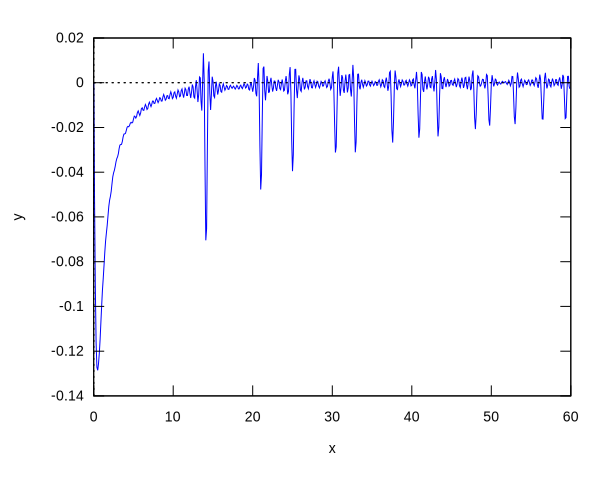

(%o29)             [/tmp/maxout93.gnuplot, /tmp/maxplot.svg]

In [20]:
plot2d([discrete,makelist(i*tres,i,0,length(errlist)-1),errlist/length(xlist)]);

In [28]:
/*
The LMFDB Collaboration, The L-functions and Modular Forms Database, 
home page of the Zeros of zeta(s),
https://www.lmfdb.org/zeros/zeta/?limit=200&N=1, 2020 , [Online; accessed 10 October 2020].
*/
img_rho:[
14.1347251417346937904572519835625,
21.0220396387715549926284795938969,
25.0108575801456887632137909925628,
30.4248761258595132103118975305840,
32.9350615877391896906623689640747,
37.5861781588256712572177634807053,
40.9187190121474951873981269146334,
43.3270732809149995194961221654068,
48.0051508811671597279424727494277,
49.7738324776723021819167846785638,
52.9703214777144606441472966088808,
56.4462476970633948043677594767060,
59.3470440026023530796536486749922
]$
/* The rest 187 zeros are omitted as we draw graph up to 1/2+60*%i. */

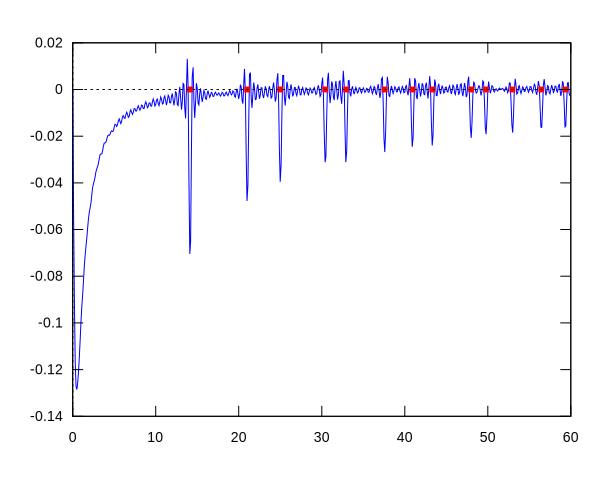

(%o55)             [/tmp/maxout93.gnuplot, /tmp/maxplot.svg]

In [49]:
plot2d([[discrete,makelist(i*tres,i,0,length(errlist)-1),errlist/length(xlist)],[discrete,makelist([img_rho[i],0],i,1,13)]],
[style,[lines],[points,1]],[legend,false]);